<a href="https://colab.research.google.com/github/Agunyo/boys-club-/blob/main/Stock_Analysis_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[*********************100%***********************]  2 of 2 completed


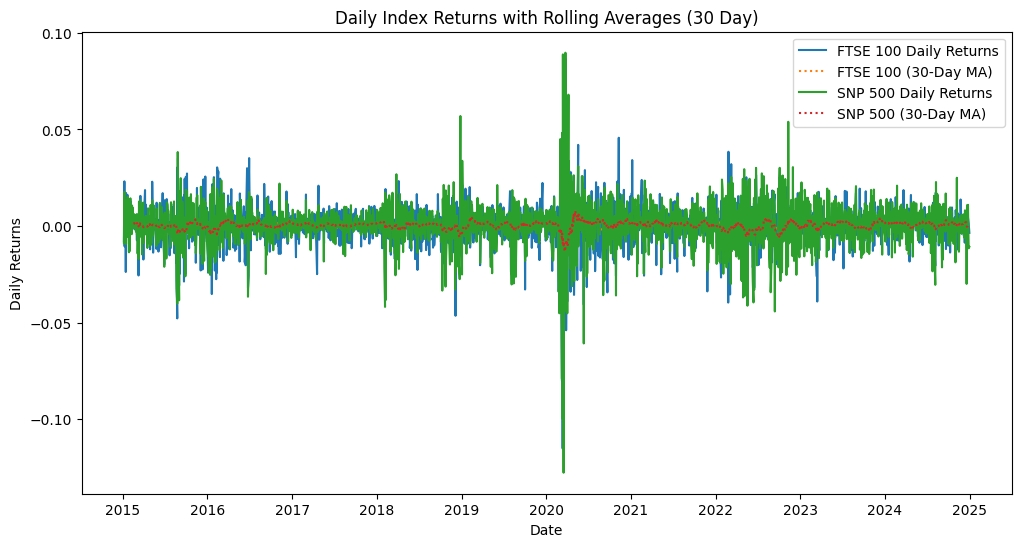

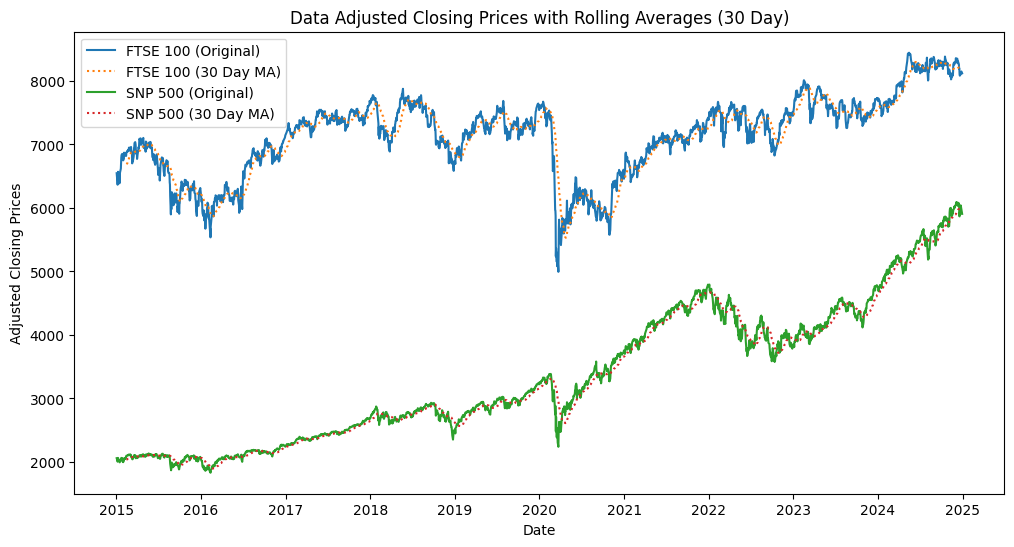


Table 1: Quartile Analysis of FTSE 100 and SNP 500 Market Returns
Ticker        ^FTSE        ^GSPC        covid        ruwar
count   2466.000000  2466.000000  2466.000000  2466.000000
mean       0.000095     0.000435     0.100568     0.283861
std        0.010026     0.011366     0.300816     0.450961
min       -0.115117    -0.127652     0.000000     0.000000
25%       -0.004422    -0.003808     0.000000     0.000000
50%        0.000598     0.000690     0.000000     0.000000
75%        0.005036     0.005794     0.000000     1.000000
max        0.086664     0.089683     1.000000     1.000000


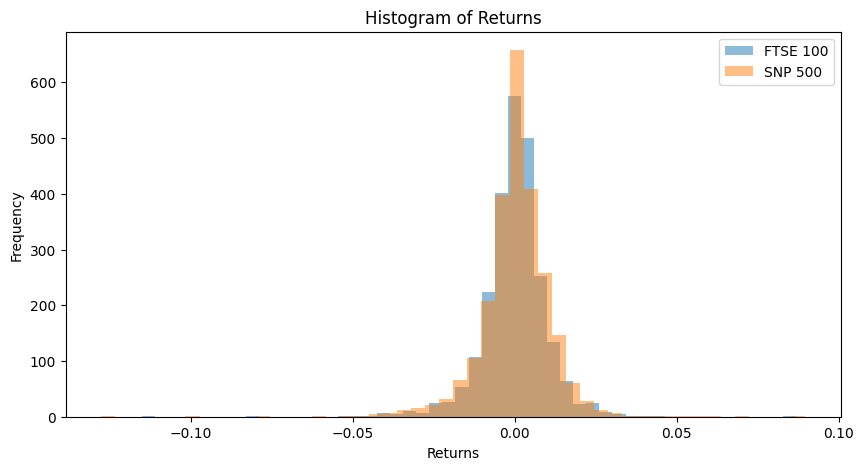

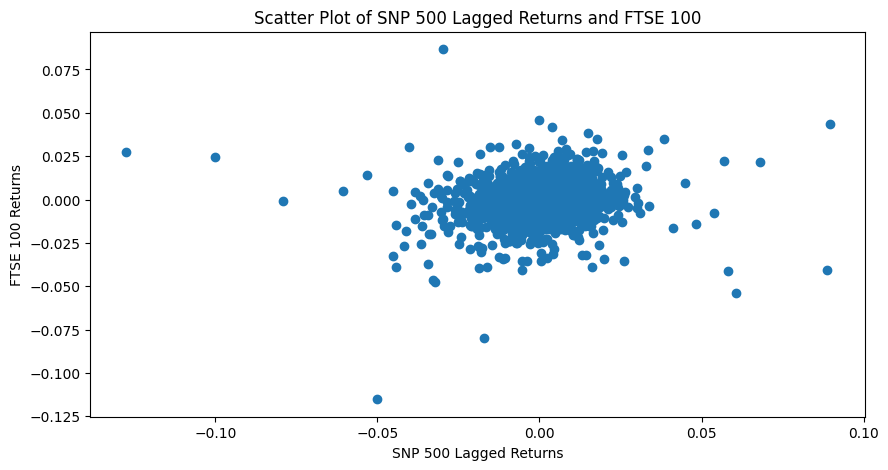

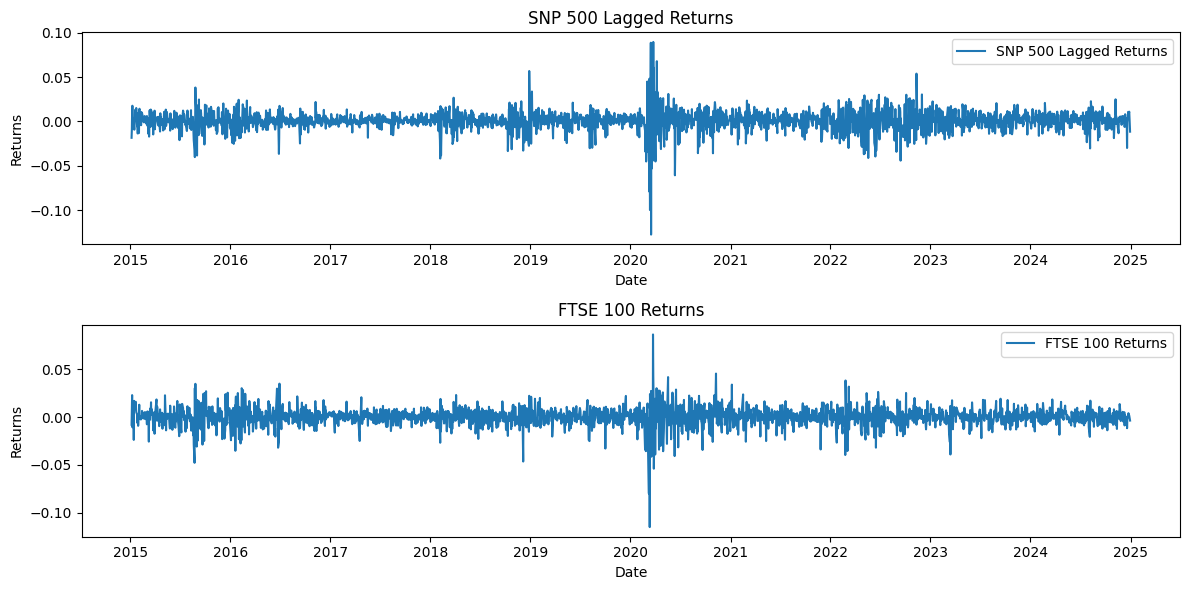


Table: Annual Arithmetic and Geometric Mean Returns
      FTSE 100 Arithmetic Mean  SNP 500 Arithmetic Mean  FTSE 100 Std  \
year                                                                    
2015                 -0.000112                 0.011010      0.000047   
2016                  0.000543                 0.010718      0.000367   
2017                  0.000298                 0.005474      0.000719   
2018                 -0.000540                 0.008310     -0.000261   
2019                  0.000461                 0.007477      0.001023   
2020                 -0.000624                 0.018749      0.000607   
2021                  0.000541                 0.008019      0.000964   
2022                  0.000037                 0.010429     -0.000890   
2023                  0.000151                 0.007404      0.000886   
2024                  0.000198                 0.005993      0.000866   

      SNP 500 Std  FTSE 100 Geometric Mean  SNP 500 Geometric Mean  
y

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Wed Mar 19 11:51:22 2025

@author: Administrator
"""
# Import packages
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import yfinance as yf  # Assuming yfinance is already installed

# Import data
Data1 = yf.download(["^FTSE", "^GSPC"], start="2015-01-01", end="2024-12-31", interval="1d")['Close']

# Drop NaN values
Data1 = Data1.dropna()

# Calculate stock returns
rets = np.log(Data1 / Data1.shift(1))

# Create lag
rets['lus'] = rets["^GSPC"].shift(1)

# Drop NaN values after creating lag
rets = rets.dropna()

# --- Visualizations and Tables ---

# Time Series: Daily index returns with rolling averages (30 day)
plt.figure(figsize=(12, 6))
plt.plot(rets.index, rets['^FTSE'], label='FTSE 100 Daily Returns')
plt.plot(rets.index, rets['^FTSE'].rolling(30).mean(), label='FTSE 100 (30-Day MA)', linestyle='dotted')
plt.plot(rets.index, rets['^GSPC'], label='SNP 500 Daily Returns')
plt.plot(rets.index, rets['^GSPC'].rolling(30).mean(), label='SNP 500 (30-Day MA)', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Index Returns with Rolling Averages (30 Day)')
plt.legend()
plt.show()

# Time Series: Data Adjusted Closing Averages Prices with Rolling Averages (30 Day)
plt.figure(figsize=(12, 6))
plt.plot(Data1.index, Data1['^FTSE'], label='FTSE 100 (Original)')
plt.plot(Data1.index, Data1['^FTSE'].rolling(30).mean(), label='FTSE 100 (30 Day MA)', linestyle='dotted')
plt.plot(Data1.index, Data1['^GSPC'], label='SNP 500 (Original)')
plt.plot(Data1.index, Data1['^GSPC'].rolling(30).mean(), label='SNP 500 (30 Day MA)', linestyle='dotted')
plt.xlabel('Date')
plt.ylabel('Adjusted Closing Prices')
plt.title('Data Adjusted Closing Prices with Rolling Averages (30 Day)')
plt.legend()
plt.show()

# Extract date from index column for Table 1 and Annual Returns Table
rets.index = pd.to_datetime(rets.index)
rets['year'] = rets.index.year

# Covid dummy variable for Table 1 and Annual Returns Table
rets['covid'] = np.where((rets.year == 2020), 1, 0)

# War dummy variable for Table 1 and Annual Returns Table
rets['ruwar'] = (rets.index >= '2022-02-24').astype(int)

# Table 1: Quartile Analysis of FTSE 100 and SNP 500 Market Returns
quartile_data = rets[['^FTSE', '^GSPC', 'covid', 'ruwar']]
quartile_stats = quartile_data.describe()
print('\nTable 1: Quartile Analysis of FTSE 100 and SNP 500 Market Returns')
print(quartile_stats)

# Histogram of Returns
plt.figure(figsize=(10, 5))
plt.hist(rets['^FTSE'], bins=50, alpha=0.5, label='FTSE 100')
plt.hist(rets['^GSPC'], bins=50, alpha=0.5, label='SNP 500')
plt.xlabel('Returns')
plt.ylabel('Frequency')
plt.title('Histogram of Returns')
plt.legend()
plt.show()

# Scatter Plot of SNP 100 Lagged Returns and FTSE 100
plt.figure(figsize=(10, 5))
plt.scatter(rets['lus'], rets['^FTSE'])
plt.xlabel('SNP 500 Lagged Returns')
plt.ylabel('FTSE 100 Returns')
plt.title('Scatter Plot of SNP 500 Lagged Returns and FTSE 100')
plt.show()

# Time Series of SNP 100 Lagged Returns and FTSE 100 (Separate charts)
plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(rets.index, rets['lus'], label='SNP 500 Lagged Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('SNP 500 Lagged Returns')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(rets.index, rets['^FTSE'], label='FTSE 100 Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.title('FTSE 100 Returns')
plt.legend()
plt.tight_layout()
plt.show()

# Table: Annual Arithmetic and Geometric Mean Returns
annual_returns = rets.groupby('year')[['^FTSE', '^GSPC']].agg(['mean', 'std'])
annual_returns.columns = ['FTSE 100 Arithmetic Mean', 'SNP 500 Arithmetic Mean',
                          'FTSE 100 Std', 'SNP 500 Std']

# Calculate geometric mean
annual_geometric_returns = rets.groupby('year')[['^FTSE', '^GSPC']].apply(lambda x: (1 + x).prod()**(1/len(x)) - 1)
annual_geometric_returns.columns = ['FTSE 100 Geometric Mean', 'SNP 500 Geometric Mean']

# Merge arithmetic and geometric means
annual_returns = pd.concat([annual_returns, annual_geometric_returns], axis=1)

print('\nTable: Annual Arithmetic and Geometric Mean Returns')
print(annual_returns)

# --- Original Code (Regression Models) ---

# Drop GSPC column
rets = rets.drop(columns=['^GSPC'])

# Estimate model 1 for single regression
Y = rets.iloc[:, 0]
X = rets.iloc[:, 1]
X = sm.add_constant(X)
model = sm.OLS(Y, X)
result = model.fit()
print(result.summary())  # Print the summary

# Estimate model 2 (Dummy variable)
rets = rets.drop(columns=['year'])  # Drop 'year' column here
Y = rets.iloc[:, 0]
X = rets.iloc[:, 1:]
X = sm.add_constant(X)
model2 = sm.OLS(Y, X)  # Changed mode2 to model2
result2 = model2.fit()  # Assign result to result2
print(result2.summary())  # Print the summary